In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

%matplotlib inline

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [5]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

Продакт-менеджер попросил вас проанализировать совершенные покупки и ответить на вопросы:

### Предварительное изучение и обработка данных

### customers 
таблица с уникальными идентификаторами пользователей

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

In [7]:
customers.shape

(99441, 5)

In [8]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [9]:
# пропущенные значения отсутствуют
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
# customer_unique_id могут соответствовать несколько customer_id
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

### orders
таблица заказов

In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

In [12]:
orders.shape

(99441, 8)

In [13]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [14]:
# конвертируем колонки в datetime
orders[['order_purchase_timestamp', 'order_approved_at', 
        'order_delivered_carrier_date', 'order_delivered_customer_date', 
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 
                                                    'order_delivered_carrier_date', 'order_delivered_customer_date', 
                                                    'order_estimated_delivery_date']].apply(pd.to_datetime)

In [15]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

### order_items
товарные позиции, входящие в заказы

In [17]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

In [18]:
order_items.shape

(112650, 7)

In [19]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [20]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

### Что считается покупкой

Условия, при которых заказ считать покупкой:
1. Заказ оплачен, т.е. указано время подтверждения оплаты заказа
2. Статус заказа - доставлен (пока заказ не доставлен и не принят покупателем, это считается задолженностью продавца, переход права собственности происходит в момент вручения товара)

Дата покупки - дата оплаты (order_approved_at)

In [22]:
orders[orders['order_approved_at'].notnull() & (orders.order_status == "delivered")].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


При этом в данных обнаружены возможные ошибки:
1. Некоторые заказы имеют статус delivered и дату доставки не NaN, но при этом отсутствует дата оплаты (требуется уточнение, может быть ошибка сбора данных).
Данные заказы я буду считать покупкой, при этом дату оплаты примем равной дате создания заказа (большинство оплат имеет интервал 0-4 дня после даты создания заказа)

In [23]:
orders[orders['order_approved_at'].isnull() & (orders.order_status == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


2. Статус заказа delivered, есть дата оплаты, отсутствует дата доставки. Возможно, ошибка системы. Данные заказы будем считать покупкой

In [26]:
orders[orders['order_delivered_customer_date'].isnull() & (orders.order_status == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [27]:
# таблица с покупками
purchases = orders[orders['order_approved_at'].notnull() & (orders.order_status == "delivered") # условия покупки
            | (orders['order_approved_at'].isnull() & orders['order_delivered_customer_date'].notnull())].copy() # заказы с ошибкой

In [28]:
purchases.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [29]:
# заменяем NaN в дате оплаты на дату создания заказа
purchases['order_approved_at'] = purchases['order_approved_at'].fillna(purchases["order_purchase_timestamp"])

Таблица покупок

In [30]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


# 1 вопрос

### Сколько у нас пользователей, которые совершили покупку только один раз?

In [31]:
customers.customer_id.nunique()

99441

In [32]:
purchases.customer_id.nunique()

96478

In [33]:
# объединяем таблицу с покупками с таблицей пользователей
customer_purchases = purchases.merge(customers, on='customer_id', how='left')

In [34]:
customer_purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [35]:
customer_purchases.groupby('customer_unique_id', as_index=False) \
                  .agg({'order_id': 'count'}) \
                  .query('order_id == 1').order_id.count()

90557

### Ответ: 90557

# 2 вопрос

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Заказ не доставлен, если дата доставки не определена и статус заказа не равен delivered

Месяц для расчета берем ожидаемый месяц доставки (order_estimated_delivery_date)

In [36]:
undelivered_orders = orders[orders['order_delivered_customer_date'].isnull() & (orders.order_status!="delivered")].copy()

In [37]:
# Всего недоставленных заказов 2957
undelivered_orders.shape

(2957, 8)

In [38]:
# ожидаемый год и месяц доставки
undelivered_orders['estimated_month'] = undelivered_orders['order_estimated_delivery_date'].dt.strftime('%Y-%m')

In [39]:
undelivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_month
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-10
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-02


In [40]:
month_undelivered_orders = undelivered_orders.groupby(['estimated_month', 'order_status'], as_index=False) \
                                             .agg({'order_id': 'nunique'})

In [41]:
month_undelivered_orders

,estimated_month,order_status,order_id
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-10,shipped,1
3,2016-11,canceled,10
4,2016-11,invoiced,9
...,...,...,...
110,2018-08,unavailable,22
111,2018-09,canceled,49
112,2018-09,shipped,4
113,2018-10,canceled,12


### Ответ

In [42]:
month_undelivered_orders.groupby('order_status', as_index=False) \
                        .agg({'order_id': 'mean'}) \
                        .sort_values('order_id', ascending=False) \
                        .round(2)

,order_status,order_id
5,shipped,48.13
6,unavailable,29.00
1,canceled,23.81
4,processing,15.84
3,invoiced,14.95
2,created,1.67
0,approved,1.00


Причины недоставленных заказов:
- shipped товар отгружен со склада и передан в логистическую службу. Если данные собираются в режиме реального времени, то необходимо анализировать ожидаемые даты поставки, если эта дата наступила, то причинами могут быть задержки доставки, ошибки в данных,  и тд. (1107 заказов)
- canceled заказ отменен (619 заказов)
- unavailable скорее всего сам товар был недоступен к заказу, нет на складе (609 заказов)
- invoiced возможно не был оплачен выставленный счет (314 заказов)
- processing заказ в процессе сборки, еще не отгружен, возможно чего-то не хватает для сборки (301 заказ)
- created —  заказ создан, но не подтвержден (5 заказов)
- approved заказ подтвержден (2 заказа)

Также стоит обратить внимание на заказы, недоставленные вовремя (7827 заказов) 

In [43]:
orders['delay'] = (orders.order_delivered_customer_date > orders.order_estimated_delivery_date)

In [44]:
orders.query('delay == True').shape

(7827, 9)

# 3 вопрос

### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [45]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [46]:
order_items.product_id.nunique()

32951

In [47]:
products = order_items.merge(purchases, on='order_id', how='inner')

In [48]:
products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [49]:
# день недели
products['weekday'] = products.order_approved_at.dt.day_name()

### Ответ

In [50]:
products.groupby(["product_id", "weekday"]) \
        .agg({'order_id': 'count'}) \
        .sort_values('order_id') \
        .groupby(level=0).tail(1) \
        .sort_values('order_id', ascending=False) \
        .reset_index()

,product_id,weekday,order_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
1,53b36df67ebb7c41585e8d54d6772e08,Tuesday,104
2,422879e10f46682990de24d770e7f83d,Tuesday,89
3,368c6c730842d78016ad823897a372db,Thursday,80
4,99a4788cb24856965c36a24e339b6058,Tuesday,78
...,...,...,...
32211,c59e6dced23214126ac972a4a4525e87,Monday,1
32212,c63f9ad806cc588df99a5f29323335b0,Wednesday,1
32213,c60d6fe365c9718c407170dd8a8223c3,Monday,1
32214,c615805546392ec3b8a20c6590c4d400,Sunday,1


# 4 вопрос

### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть

In [51]:
# дата покупки - order_approved_at
customer_purchases['payment_date'] = customer_purchases['order_approved_at'].dt.strftime('%Y-%m-%d')

In [52]:
# количество недель в месяце
customer_purchases['weeks'] = customer_purchases['payment_date'].apply(lambda x: pd.Period(x).days_in_month) / 7

In [53]:
customer_purchases.payment_date = customer_purchases.payment_date.astype('datetime64')

In [54]:
# по каждому пользователю считаем суммарное количество заказов и количество недель
purchases_per_week = customer_purchases.groupby('customer_unique_id', as_index=False) \
                                       .agg({'order_id': 'count', 'weeks': 'sum'}).sort_values('order_id')

In [55]:
# покупки в среднем
purchases_per_week['avg_purchases_per_week'] = purchases_per_week.order_id / purchases_per_week.weeks

### Ответ

In [56]:
purchases_per_week

,customer_unique_id,order_id,weeks,avg_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,1,4.428571,0.225806
61790,a942d415001f36acf150dca4a627f6aa,1,4.428571,0.225806
61789,a942ba2a7bed631c5d4ec4d756b9df90,1,4.428571,0.225806
61788,a942204dbe5292ccb73d3171b6d03d54,1,4.285714,0.233333
61787,a941c257a51188577ec66ddbeee21403,1,4.285714,0.233333
...,...,...,...,...
73921,ca77025e7201e3b30c44b472ff346268,7,29.857143,0.234450
36706,6469f99c1f9dfae7733b25662e7f1782,7,30.571429,0.228972
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7,30.285714,0.231132
22779,3e43e6105506432c953e165fb2acf44c,9,38.000000,0.236842


# 5 вопрос

### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

In [57]:
customer_purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_date,weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-26,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13,4.000000


In [58]:
print('Orders from {} to {}'.format(customer_purchases['order_approved_at'].min(),
                                    customer_purchases['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-08-29 15:10:26


In [59]:
# берем целый год, 2017
purchases_year = customer_purchases.query('"2017-01-01" <= payment_date <= "2017-12-31"').copy()

In [60]:
# месяц оплаты
purchases_year['payment_month'] = purchases_year['payment_date'].dt.month

In [61]:
# для каждого уникального пользователя определяем первый заказ
first_order_df = purchases_year.groupby('customer_unique_id', as_index=False) \
                               .agg({'payment_date': 'min'}) \
                               .rename(columns = {'payment_date': 'first_order'})

In [62]:
first_order_df.head()

,customer_unique_id,first_order
0,0000f46a3911fa3c0805444483337064,2017-03-10
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18


In [63]:
# добавляем данные по первому заказу
cohorts = purchases_year.merge(first_order_df, on='customer_unique_id')

In [64]:
cohorts.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_date,weeks,payment_month,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02,4.428571,10,2017-09-04
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04,4.285714,9,2017-09-04
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18,4.285714,11,2017-11-18
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07-09,4.428571,7,2017-07-09
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05-16,4.428571,5,2017-05-16


In [65]:
# разница между месяцем заказа и первым заказом
cohorts['month'] = cohorts['payment_month'] - cohorts['first_order'].dt.month

In [66]:
cohorts['first_order'] = cohorts['first_order'].dt.strftime('%Y-%m')

In [67]:
# количество покупателей по когортам
cohorts = cohorts.pivot_table('customer_unique_id', index='first_order', columns='month', aggfunc='count')

In [68]:
cohorts

month,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-01,717.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0
2017-02,1647.0,3.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN
2017-03,2549.0,12.0,9.0,11.0,9.0,4.0,4.0,8.0,7.0,3.0,NaN,NaN
2017-04,2261.0,15.0,6.0,5.0,5.0,6.0,9.0,6.0,8.0,NaN,NaN,NaN
2017-05,3518.0,19.0,16.0,10.0,10.0,13.0,16.0,5.0,NaN,NaN,NaN,NaN
2017-06,3099.0,16.0,13.0,13.0,10.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3777.0,22.0,12.0,7.0,15.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4158.0,28.0,17.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4093.0,27.0,20.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Retention rate
retention = cohorts.div(cohorts[0],axis=0)

### Retention

In [70]:
retention

month,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-01,1.0,0.004184,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,NaN,0.002789,0.002789
2017-02,1.0,0.001821,0.002429,0.001821,0.004250,0.001214,0.002429,0.001821,0.001214,0.001821,0.001214,NaN
2017-03,1.0,0.004708,0.003531,0.004315,0.003531,0.001569,0.001569,0.003138,0.002746,0.001177,NaN,NaN
2017-04,1.0,0.006634,0.002654,0.002211,0.002211,0.002654,0.003981,0.002654,0.003538,NaN,NaN,NaN
2017-05,1.0,0.005401,0.004548,0.002843,0.002843,0.003695,0.004548,0.001421,NaN,NaN,NaN,NaN
2017-06,1.0,0.005163,0.004195,0.004195,0.003227,0.003550,0.003550,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005825,0.003177,0.001853,0.003971,0.001853,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006734,0.004089,0.002646,0.003608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006597,0.004886,0.004153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


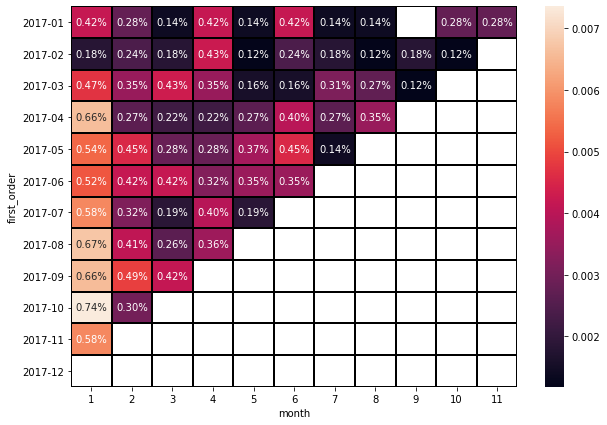

In [71]:
plt.figure(figsize=(10, 7))
sns.heatmap(retention.iloc[:, 1:], annot=True, 
            fmt='.2%', linewidths=1, linecolor='black'); 

In [72]:
retention[3].idxmax()

'2017-03'

### Ответ

Самый высокий retention на 3й месяц имеет когорта от 03-2017 г. (0,43%)

Retention для всех когорт низкий (менее 1%), покупатели редко совершают более 1 покупки.

# 6 вопрос

Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [73]:
# интервал данных о покупках
print('Orders from {} to {}'.format(customer_purchases['order_approved_at'].min(),
                                    customer_purchases['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-08-29 15:10:26


In [74]:
customer_purchases.order_id.nunique()

96478

In [75]:
# соединяем все таблицы
total_df = customer_purchases.merge(order_items, on='order_id')

In [76]:
total_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_date,weeks,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02,4.428571,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-26,4.428571,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08,4.428571,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18,4.285714,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13,4.000000,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [77]:
# сумма по каждому заказу
total_orders = total_df.groupby(['order_id', 'payment_date', 'customer_unique_id']).agg({'price': 'sum'}).reset_index()

In [78]:
total_orders.head()

,order_id,payment_date,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [79]:
# один день после послендей покупки для расчета Recency
now = total_orders['payment_date'].max() + timedelta(days=1)
now

Timestamp('2018-08-30 00:00:00')

In [80]:
# для каждого пользователя рассчитаем Recency, Frequency, Monetary
aggr = {
    'payment_date': lambda x: (now - x.max()).days,
    'order_id': lambda x: len(x),
    'price': lambda x: x.sum()
}
rfm = total_orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'payment_date': 'Recency', 'order_id': 'Frequency', 'price': 'Monetary'}, inplace=True)

In [81]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,538,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00


In [82]:
# для границ сегментов могут использоваться квинтили, но рассмотрим каждый показатель подробней
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .5, .6, .75, .8, .99]).to_dict()
quintiles

{'Recency': {0.2: 92.0,
  0.4: 177.0,
  0.5: 219.0,
  0.6: 268.0,
  0.75: 346.0,
  0.8: 382.0,
  0.99: 575.0},
 'Frequency': {0.2: 1.0,
  0.4: 1.0,
  0.5: 1.0,
  0.6: 1.0,
  0.75: 1.0,
  0.8: 1.0,
  0.99: 2.0},
 'Monetary': {0.2: 39.9,
  0.4: 69.9,
  0.5: 89.73,
  0.6: 109.9,
  0.75: 154.7375,
  0.8: 179.9,
  0.99: 1004.99}}

### Recency

<AxesSubplot:xlabel='Recency', ylabel='Count'>

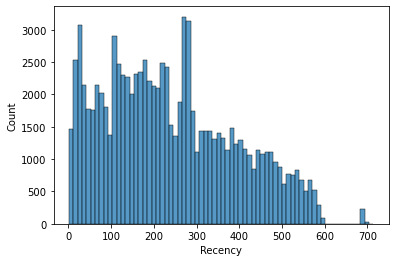

In [83]:
sns.histplot(rfm.Recency)

Recency предлагается разделить на сегменты с экономической точки зрения с учетом перцентилей (в идеале нужно еще учитывать специфику товаров, длительность их использования):
    - до 90 дней (покупали недавно, около 20% пользователей)
    - от 90 до 365 дней (основная часть пользователей, около 60%)
    - свыше 365 дней (не покупали давно, около 20% пользователей)

### Frequency

In [84]:
rfm.Frequency.value_counts()

1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: Frequency, dtype: int64

Большинство пользователей (97%) совершили 1 покупку, поэтому имеет смысл разделить пользователей по Frequency на 2 сегмента:
    - Пользователи, которые совершили 1 покупку
    - Пользователи, которые совершили более 1 покупки

### Monetary

<AxesSubplot:xlabel='Monetary'>

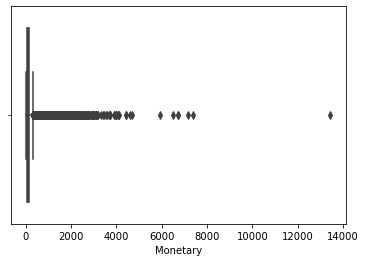

In [85]:
# график имеет выбросы
sns.boxplot(x='Monetary', data=rfm)

Monetary будет иметь следующие границы:
    - < 90 (примерно до медианы)
    - от 90 до 1000 (примерно до 99-го перцентиля)
    - более 1000 (1% от всех пользователей, выделяем крупные заказы)
До 1000 у.е. попадают почти все пользователи, свыше - самые крупные

In [86]:
# функции для определения границ
# Recency
def r_score(x):
    if x <= 90:
        return 3
    elif x <= 365:
        return 2
    else:
        return 1

# Frequency
def f_score(x):
    if x <= 1:
        return 1
    else:
        return 2

# Monetary
def m_score(x):
    if x <= 90:
        return 1
    elif x <= 1000:
        return 2
    else:
        return 3

In [87]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [88]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [89]:
# получилось 18 сегментов, при необходимости сегменты можно укрупнить
rfm.RFM_Score.value_counts()

211    27677
212    24298
111    11096
311     9348
112     8970
312     8294
222     1381
213      515
322      500
122      382
221      269
113      182
313      177
121      109
321       96
223       40
323       17
123        7
Name: RFM_Score, dtype: int64

<AxesSubplot:xlabel='RFM_Score', ylabel='count'>

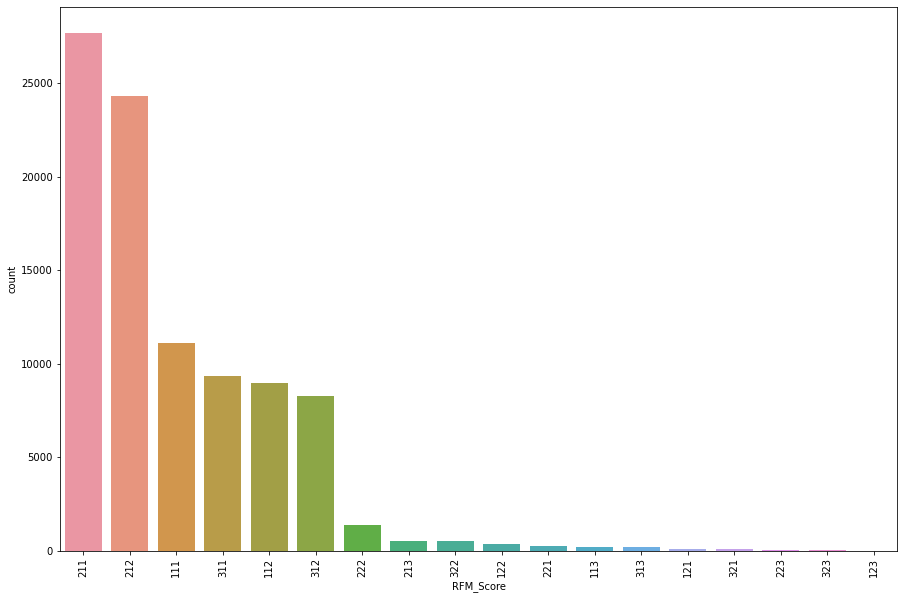

In [90]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.countplot(x='RFM_Score', data=rfm, order = rfm['RFM_Score'].value_counts().index)

### Вывод

Границы сегментов:
- Recency {3: до 90 дней, 2: от 90 до 365 дней, 1: свыше 365 дней}
- Frequency {1: 1 покупка, 2: более 1 покупки}
- Monetary {1: до 90 у.е., 2: от 90 до 1000 у.е., 3: более 1000 у.е.}

Самые большие сегменты 211 и 212, то есть пользователи совершили покупку 1 раз, в средний срок от 90 до 365 дней, сумма покупок до 1000 у.е.

Основная часть аудитории совершила только 1 покупку. Это может быть связано, например, со спецификой товаров (товары длительного пользования), с самими товарами (качеством), рекламой и т.д., необходимо работать над возвращаемостью клиентов.

Также стоит обратить внимание на сегменты с Monetary - 3, аудиторию, которая совершает большие покупки (более 1000 у.е.), их количество составляет около 1%, необходимо проработать персональные предложения.